# Tutorial 9: fine-tuning vehicle behaviour.
______________________________________________________________________________________

## Overview:
In this tutorial, we will explore how to change the velocity of vehicles once it passes different nodes. We will also consider each vehicle to be a primitive agent with basic planning capabilities and learn how to adjust its planning mechanism.

### Adjusting the velocity from a node.
Often when vehicles pass a sign indicating that the speed limit has changed then the vehicle will adjust its average velocity. A specific node can serve as that point where the sign is located. This point leads to a change in vehicle behaviour. 
We show how to do this with an example below. We will first slow down vehicles and then speed them up. 

To reproduce results, please see `/Basik_Tutorial/Console_Scripts/velocity_change.py`.

In [1]:
import __basik__ as bk

/home/dylan/Documents/Basik_Tutorial/__basik__/__init__.py:37: UserWarning: __basik__ has picked up that it is currently being run from within a Ipython or Jupyter Notebook. Display components requireQtA5gg to render. Most Ipython-based interactive notebooks havetheir kernel shut down when using QtA5gg as a Matplotlib backend. Hence, __basik__ will not use QtA5gg. As a result, please refrain from using __basik__ display components while in the Ipython or Jupyter Notebook environment. If display components are required, please use Ipython in a console. The Spyder IDE for Python is highly recommended.
  warnings.warn(message)


Importing matplotlib.pyplot as plt



/home/dylan/Documents/Basik_Tutorial/__basik__/utils.py:160: UserWarning: Choosing the scale to be too large might result in a plot that does not fit onto the monitor.
  warnings.warn(message)


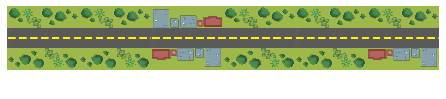

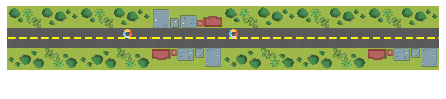

In [2]:
bk.VehicleDisplay.speed_up_factor = 10
bk.Vehicle.frames_per_move = 2
import numpy as np
np.random.seed(123)
bk.Queue.clear()
fig,ax = bk.axes_grid(1,1,scale=6)  
end_time = 20
# Let us create a single lane object
lane = bk.Lane(20)
lane_display = bk.RoadDisplay(left_lane=lane,
                              right_lane=None,
                              axes=ax[0,0],
                              horizontal=True,
                              square_image=False)  # removes some detail and gives a road strip
rate = {end_time:bk.Rate(0.5)} 
source = bk.Source(vehicle_velocity = 16.67,      # INITIAL VELOCITY is 60 km/h
                   target_node = lane.IN,
                   rate_schedule=rate)
source.setup_arrivals(20)
# Let us schedule three obstructions at some node
lane.nodes[5].assign_velocity_change(5.55)            # change to about 20 km/h
lane.nodes[10].assign_velocity_change(27.77)          # change to about 100 km/h  
# Run
#bk.Queue.run(end_time)
fig

In [3]:
from IPython.display import Video
import os
path = os.getcwd()+'/Videos/velocity_change.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

It is interesting to note that an increased velocity is obtained by the vehicle being extracted from the heap more often. 

### Planning capabilties of a vehicle
There are three class attributes that can be changed to affect vehicle behaviour via its planning: `look_ahead` and `velocity_correction` and `smooth`. We refer to the documentation below for discussions on these three attributes. We show how to change the attributes. Note: because these are class attributes and not class instance attributes, these changes will be adopted by the entire population of vehicles. This differs from vehicle velocity which is class instance attribute and specific to the instance of a vehicle.

In [4]:
help(bk.Vehicle)

Help on class Vehicle in module __basik__.VehicleObject.vehicle:

class Vehicle(builtins.object)
 |  Vehicle(velocity, global_time, current_node, source_ID, color='blue', swivel_when_delayed=False, record_movement=False)
 |  
 |  Vehicles move forward by occupying nodes and interact with eachother as
 |  well as other components in the simulation. The purpose of a simulation
 |  is to study the flow of vehicles through the specidied setting/environment.
 |  
 |  One can regard a vehicle as a basic agent that interacts with its immediate
 |  environment as is capable of some basic planning as to avoid collisions.
 |  
 |  Attributes:
 |  ------------
 |  delay_time: float
 |      A vehicle takes a certain amount of time to move from one node to 
 |      another. This time can be extracted from self.move_duration which gives
 |      the duration of the vehicle's last move. This duration depends 
 |      primarily on the velocity. However, a vehicle must be able to react to
 |      change

In [5]:
bk.Vehicle.look_ahead = 5  # integer: how far ahead the vehicle looks to plan. Large values are
                           # more expensive. Setting it to None or 1 leads to a primitive greedy agent.
bk.Vehicle.velocity_correction = 0.2  # vehicle is hesitant to change velocity
bk.Vehicle.velocity_correction = 1.0  # vehicle changes velocity rapidly
bk.Vehicle.smooth = False # vehicle will change velocity abruptly (rather unnatural)
                           # Almost like an emergency brake.
bk.Vehicle.smooth = True  # smooth and natural velocity change.

## Conlusion/Summary
In this tutorial we have seen that vehicles are basic planning agents and can have their behaviour fine-tuned to suit certain scenarios. Note that increasing the planning capacity of vehicles (increasing `look_ahead` leads to a computationally more expensive simulation.

In the next tutorial, we learn how to use sessions to save entire simulations.